**Decision Tree Implementation using Inbuild Library**

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
x,y = make_moons(n_samples=10000, noise=0.4)


In [2]:
x,y

(array([[-0.27196372, -0.09263649],
        [ 1.73916701,  0.04530115],
        [ 0.95186706, -0.4746918 ],
        ...,
        [-0.68239678,  1.12482939],
        [ 2.18995847,  0.55818851],
        [ 1.66220836, -0.78737005]]),
 array([1, 1, 1, ..., 0, 1, 1]))

In [8]:
len(x)

10000

In [3]:
x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=0.2,random_state = 42)

In [9]:
len(x_train)

8000

In [4]:
Dec_clf = DecisionTreeClassifier()
max_leaf_nodes= {"max_leaf_nodes":[None,5,10,15,20]}
grid_search = GridSearchCV(Dec_clf,max_leaf_nodes,cv=5)
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [None, 5, 10, 15, 20]})

In [5]:
model = grid_search.fit(x_train,y_train)

In [6]:
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'max_leaf_nodes': 20}
Best Score:  0.85625


In [25]:
model.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=20)

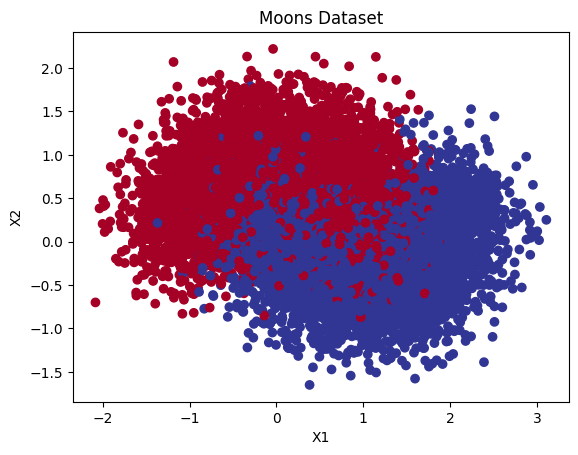

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Moons Dataset')
plt.show()

**Growing a forest for this data**

In [13]:
from sklearn.model_selection import ShuffleSplit
no_of_trees = 1000
no_of_instances = 100

suf_spl = ShuffleSplit(n_splits=no_of_trees, test_size = len(x_train)- no_of_instances,random_state=42)

In [29]:
mini_sets = []
for mini_train_index, mini_test_index in suf_spl.split(x_train):
  x_mini_train = x_train[mini_train_index]
  y_mini_train = y_train[mini_train_index]
  mini_sets.append((x_mini_train,y_mini_train))

In [31]:
Forest = [clone(model.best_estimator_) for _ in range(no_of_trees)]

NameError: ignored